# intro to heat loss

this notebook shows how to use `compute_specific_heat_loss` and read the breakdown columns.


In [2]:
import sys
import pathlib

repo_root = pathlib.Path('..').resolve()
if str(repo_root) not in sys.path:
    sys.path.insert(0, str(repo_root))

import pandas as pd
from heat_loss_simulation import compute_specific_heat_loss
from visualizations import plot_house_thermal_map

## 1. define a base case

we start with a simple house profile. you can change values and re-run the cell.


In [3]:
base_params = {
    'sqft_roof': 1800,
    'sqft_walls': 1500,
    'roof_material_type': 'wood',
    'wall_material_type': 'wood',
    'ambient_temp_F': 30,
    'T_inside_F': 70,
    'duration_hours': 24,
    'insulation_r_value': 'R13-R15',
    'air_changes_per_hour': 0.5,
    'window_area_sqft': 400,
    'window_type': 'double',
    'electricity_cost_per_kWh': 0.12,
}
base_params

{'sqft_roof': 1800,
 'sqft_walls': 1500,
 'roof_material_type': 'wood',
 'wall_material_type': 'wood',
 'ambient_temp_F': 30,
 'T_inside_F': 70,
 'duration_hours': 24,
 'insulation_r_value': 'R13-R15',
 'air_changes_per_hour': 0.5,
 'window_area_sqft': 400,
 'window_type': 'double',
 'electricity_cost_per_kWh': 0.12}

## 2. run the model and inspect outputs

`compute_specific_heat_loss` returns a DataFrame with component and total heat loss.


In [4]:
df = compute_specific_heat_loss(**base_params)
df

,sqft_roof,sqft_walls,roof_material_type,wall_material_type,ambient_temp_F,T_inside_F,duration_hours,insulation_r_value,air_changes_per_hour,window_area_sqft,...,Q_roof_kWh,Q_walls_kWh,Q_windows_kWh,Q_infiltration_kWh,Q_roof_pct,Q_walls_pct,Q_windows_pct,Q_infiltration_pct,total_cost,Q_total_kWh
0,1800,1500,wood,wood,30,70,24,R13-R15,0.5,400,...,34.427911,22.529631,55.494059,67.447578,19.137336,12.523476,30.847311,37.491877,21.587901,179.899179


key columns:

- `Q_roof_kWh`, `Q_walls_kWh`, `Q_windows_kWh`, `Q_infiltration_kWh`: energy lost by component
- `Q_roof_pct`, `Q_walls_pct`, `Q_windows_pct`, `Q_infiltration_pct`: share of total loss
- `Q_total_kWh`: total heat loss over the duration
- `total_cost`: cost of that heat loss at the given electricity rate


## 3. quick sensitivity checks

below we vary one parameter at a time to see the effect on `Q_total_kWh` and `total_cost`.


In [5]:
def sweep_param(param_name, values, base):
    rows = []
    for v in values:
        params = dict(base)
        params[param_name] = v
        out = compute_specific_heat_loss(**params).copy()
        out[param_name] = v
        rows.append(out)
    return pd.concat(rows, ignore_index=True)

In [6]:
ambient_range = [20, 30, 40, 50]
df_ambient = sweep_param('ambient_temp_F', ambient_range, base_params)
df_ambient[['ambient_temp_F', 'Q_total_kWh', 'total_cost']].round(2)

,ambient_temp_F,Q_total_kWh,total_cost
0,20,224.87,26.98
1,30,179.90,21.59
2,40,134.92,16.19
3,50,89.95,10.79


try similar sweeps for `insulation_r_value` or `window_type` by changing `param_name` and `values`.


<Axes: >

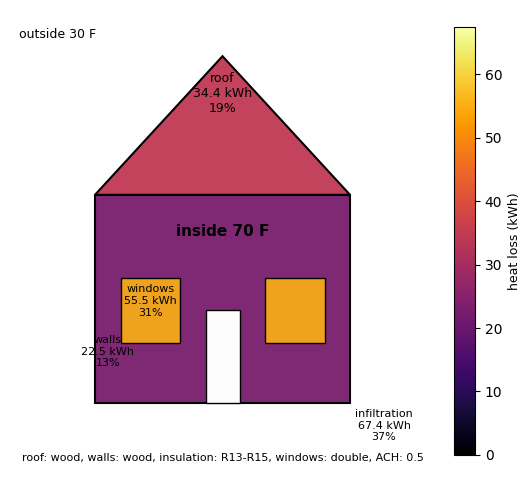

In [8]:
df_case = compute_specific_heat_loss(**base_params)
plot_house_thermal_map(df_case)